In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [412]:
responses = pd.read_excel('Covid-19 lockdowns (Responses).xlsx')

In [413]:
responses.head()

,Timestamp,I believe that Covid-19 poses a relevant threat to my personal health and well-being.,I believe that Covid-19 poses a relevant threat to the health and well-being of my loved ones.,I strictly follow the recommendations of my country’s health authority to avoid Covid-19.,I dedicated more time to personal hobbies during lockdown.,I spent more time watching TV during lockdown.,I spent more time browsing the internet during lockdown.,Average number of hours of sleep per night before Covid-19.,Average number of hours of sleep per night after Covid-19.,"Average number of cigarettes smoked per day before Covid-19. If none, type 0.",...,My work hours were reduced during lockdown.,I experienced loss of income after lockdown went into effect.,"If you answered ""yes"" to the previous question, indicate the percentage of income lost.",Gender,Age,City of residence,Marital status,"Number of children. If none, type 0.",Profession,You may use this space for additional comments
0,2020-08-04 21:26:36.732,3,4,4,2,3,4,7,8,0,...,No,No,NaN,Male,30,"Carnide, Lisboa",Single,0,Grad Student,"Olá Celina! Bjs, Martim"
1,2020-08-04 21:49:33.398,3,4,4,2,3,4,7,8,0,...,No,No,NaN,Male,30,Lisboa,Single,0,Grad Student,Additional comments are undervalued
2,2020-08-04 22:08:05.243,4,4,3,2,3,4,8,6,0,...,No,No,NaN,Female,28,Lisboa,Single,0,Art gallery assistant,NaN
3,2020-08-04 22:08:24.789,4,4,3,4,4,4,7,8,0,...,No,Yes,NaN,Female,28,Lisbon,In a civil union,0,Researcher,NaN
4,2020-08-04 22:16:24.963,3,4,4,4,2,2,8,8,0,...,Yes,No,NaN,Female,33,Lisboa,Single,0,Conservator- restorer,NaN


In [414]:
responses.columns

Index(['Timestamp',
       'I believe that Covid-19 poses a relevant threat to my personal health and well-being.',
       'I believe that Covid-19 poses a relevant threat to the health and well-being of my loved ones.',
       'I strictly follow the recommendations of my country’s health authority to avoid Covid-19.',
       'I dedicated more time to personal hobbies during lockdown.',
       'I spent more time watching TV during lockdown.',
       'I spent more time browsing the internet during lockdown.',
       'Average number of hours of sleep per night before Covid-19.',
       'Average number of hours of sleep per night after Covid-19.',
       'Average number of cigarettes smoked per day before Covid-19. If none, type 0.',
       'Average number of cigarettes smoked per day after Covid-19. If none, type 0.',
       'Average number of hours per week dedicated to physical activity before Covid-19.',
       'Average number of hours per week dedicated to physical activity after Cov

# Data cleaning

In [415]:
responses.rename(columns={'I believe that Covid-19 poses a relevant threat to my personal health and well-being.': "COV_threat_personal", 'I believe that Covid-19 poses a relevant threat to the health and well-being of my loved ones.': "COV_threat_others", 'I strictly follow the recommendations of my country’s health authority to avoid Covid-19.' : 'adherence_recom', 'I dedicated more time to personal hobbies during lockdown.': 'more_time_hobbies_LD', 'I spent more time watching TV during lockdown.' : 'more_time_TV_LD', 'I spent more time browsing the internet during lockdown.' : 'more_time_internet_LD', 'Average number of hours of sleep per night before Covid-19.' : 'avg_sleep_preCOV', 'Average number of hours of sleep per night after Covid-19.' : 'avg_sleep_postCOV', 'Average number of cigarettes smoked per day before Covid-19. If none, type 0.' : 'avg_cig_preCOV', 'Average number of cigarettes smoked per day after Covid-19. If none, type 0.' : 'avg_cig_postCOV', 'Average number of hours per week dedicated to physical activity before Covid-19.' : 'avg_phy-act_preCOV', 'Average number of hours per week dedicated to physical activity after Covid-19.' : 'avg_phy-act_postCOV', 'Average number of hours per week dedicated to personal hobbies before Covid-19.' : 'avg_hobbies_preCOV', 'Average number of hours per week dedicated to personal hobbies after Covid-19.' : 'avg_hobbies_postCOV', 'Average number of minutes per day spent commuting before Covid-19.' : 'avg_commute_preCOV', 'Average number of minutes per day spent commuting after Covid-19.' : 'avg_commute_postCOV', 'Average number of working hours per day before Covid-19.' : 'avg_work_preCOV', 'Average number of working hours per day after Covid-19.' : 'avg_work_postCOV', 'My workplace transitioned to remote during lockdown.' : 'work_remote_LD', 'My work hours were reduced during lockdown.' : 'work_reduced_LD', 'I experienced loss of income after lockdown went into effect.' : 'loss_income', 'If you answered "yes" to the previous question, indicate the percentage of income lost.' : 'loss_income_%', 'Number of children. If none, type 0.' : 'number_children', 'You may use this space for additional comments' : 'comments'}, inplace=True)


In [416]:
responses.columns

Index(['Timestamp', 'COV_threat_personal', 'COV_threat_others',
       'adherence_recom', 'more_time_hobbies_LD', 'more_time_TV_LD',
       'more_time_internet_LD', 'avg_sleep_preCOV', 'avg_sleep_postCOV',
       'avg_cig_preCOV', 'avg_cig_postCOV', 'avg_phy-act_preCOV',
       'avg_phy-act_postCOV', 'avg_hobbies_preCOV', 'avg_hobbies_postCOV',
       'avg_commute_preCOV', 'avg_commute_postCOV', 'avg_work_preCOV',
       'avg_work_postCOV', 'work_remote_LD', 'work_reduced_LD', 'loss_income',
       'loss_income_%', 'Gender', 'Age', 'City of residence', 'Marital status',
       'number_children', 'Profession', 'comments'],
      dtype='object')

In [417]:
responses.drop(0, axis=0, inplace=True) # Martim (pre-test)

In [418]:
# perhaps I should remove the timestamp in order to find duplicates
responses.drop('Timestamp', axis=1, inplace=True)

In [419]:
data = responses.drop_duplicates(ignore_index=True)

In [420]:
data.shape

(52, 29)

In [421]:
data.reset_index(inplace=True)

In [422]:
data.rename(columns={'index' : 'respondent_id'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [423]:

data['respondent_id'] = np.arange(1,53)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [424]:
data.head()

,respondent_id,COV_threat_personal,COV_threat_others,adherence_recom,more_time_hobbies_LD,more_time_TV_LD,more_time_internet_LD,avg_sleep_preCOV,avg_sleep_postCOV,avg_cig_preCOV,...,work_reduced_LD,loss_income,loss_income_%,Gender,Age,City of residence,Marital status,number_children,Profession,comments
0,1,3,4,4,2,3,4,7,8,0,...,No,No,NaN,Male,30,Lisboa,Single,0,Grad Student,Additional comments are undervalued
1,2,4,4,3,2,3,4,8,6,0,...,No,No,NaN,Female,28,Lisboa,Single,0,Art gallery assistant,NaN
2,3,4,4,3,4,4,4,7,8,0,...,No,Yes,NaN,Female,28,Lisbon,In a civil union,0,Researcher,NaN
3,4,3,4,4,4,2,2,8,8,0,...,Yes,No,NaN,Female,33,Lisboa,Single,0,Conservator- restorer,NaN
4,5,4,4,4,3,2,3,8,8,0,...,Yes,No,NaN,Female,34,Lisboa,In a civil union,0,Investigadora,NaN


In [425]:
data['respondent_id'] = data['respondent_id'].astype(str)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [426]:
data['respondent_id'].dtype

dtype('O')

In [427]:
data['loss_income_%'].unique()

array([ nan, 30. ,  0.2,  0.3,  0.4,  0. ,  0.1,  0.7,  1. ])

In [428]:
data['loss_income_%'].fillna(0, inplace=True)
data['loss_income_%'].replace(to_replace=30, value=0.3, inplace=True)
print(data['loss_income_%'].unique())
print(data['loss_income_%'].dtype)

[0.  0.3 0.2 0.4 0.1 0.7 1. ]
float64


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [429]:
data['comments'].fillna('No comments', inplace=True)

In [430]:
data['City of residence'].unique()

array(['Lisboa', 'Lisbon', 'Lisboa ', 'Sintra', 'Sabadell', 'Barcelona',
       'Portugal', 'Brussels', 'Porto Salvo', 'Lisbon / Oeiras',
       'Torres Vedras', 'Madrid', 'Madrid ', 'Setúbal', 'Pt', 'Berlin',
       'Ls Rozas', 'Odivelas ', 'Aveiro'], dtype=object)

In [431]:
#data['City of residence'].replace(to_replace=['Lisboa ', 'Lisboa'], value='Lisbon', inplace=True)
#data['City of residence'].replace(to_replace='Sabadell', value='Barcelona', inplace=True)

data['City of residence'].replace(to_replace=['Barcelona', 'Madrid ', 'Ls Rozas', 'Sabadell', 'Madrid'], value='Spain', inplace=True)
data['City of residence'].replace(to_replace=['Torres Vedras', 'Lisbon', 'Lisboa', 'Lisboa ', 'Lisbon / Oeiras', 'Sintra', 'Odivelas ', 'Porto Salvo', 'Aveiro', 'Setúbal', 'Pt'], value='Portugal', inplace=True)
data['City of residence'].replace(to_replace='Brussels', value='Belgium', inplace=True)
data['City of residence'].replace(to_replace='Berlin', value='Germany', inplace=True)


In [432]:
data['City of residence'].unique()

array(['Portugal', 'Spain', 'Belgium', 'Germany'], dtype=object)

In [433]:
data.rename(columns={'City of residence' : 'Country'}, inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [434]:
# New column categorizing people as parents or not parents

data['Children'] = np.where(data['number_children'] == 0, 'No', 'Yes')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Save cleaned data to excel

In [435]:
data.to_excel('data.xlsx')

# Explore data

In [436]:
data.dtypes

respondent_id             object
COV_threat_personal        int64
COV_threat_others          int64
adherence_recom            int64
more_time_hobbies_LD       int64
more_time_TV_LD            int64
more_time_internet_LD      int64
avg_sleep_preCOV           int64
avg_sleep_postCOV          int64
avg_cig_preCOV             int64
avg_cig_postCOV            int64
avg_phy-act_preCOV         int64
avg_phy-act_postCOV        int64
avg_hobbies_preCOV         int64
avg_hobbies_postCOV        int64
avg_commute_preCOV        object
avg_commute_postCOV       object
avg_work_preCOV            int64
avg_work_postCOV           int64
work_remote_LD            object
work_reduced_LD           object
loss_income               object
loss_income_%            float64
Gender                    object
Age                        int64
Country                   object
Marital status            object
number_children            int64
Profession                object
comments                  object
Children  

In [437]:
data.describe()

,COV_threat_personal,COV_threat_others,adherence_recom,more_time_hobbies_LD,more_time_TV_LD,more_time_internet_LD,avg_sleep_preCOV,avg_sleep_postCOV,avg_cig_preCOV,avg_cig_postCOV,avg_phy-act_preCOV,avg_phy-act_postCOV,avg_hobbies_preCOV,avg_hobbies_postCOV,avg_work_preCOV,avg_work_postCOV,loss_income_%,Age,number_children
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2.826923,3.384615,3.096154,2.750000,2.326923,2.942308,7.134615,7.269231,0.788462,0.961538,2.807692,2.711538,3.980769,4.653846,6.826923,6.961538,0.057692,34.923077,0.230769
std,0.984610,0.889015,0.822708,1.026607,1.004327,1.017753,1.252900,1.285140,2.569325,3.112036,2.551727,2.659327,2.445407,2.902903,2.805605,2.963580,0.182946,12.153989,0.614063
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,2.000000,3.000000,3.000000,2.000000,1.750000,2.000000,7.000000,7.000000,0.000000,0.000000,1.000000,0.750000,2.000000,2.000000,6.000000,6.000000,0.000000,28.000000,0.000000
50%,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,7.000000,8.000000,0.000000,0.000000,2.000000,2.000000,4.000000,5.000000,8.000000,8.000000,0.000000,32.000000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,8.000000,8.000000,0.000000,0.000000,4.000000,4.000000,5.000000,7.000000,8.250000,9.000000,0.000000,35.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.000000,9.000000,13.000000,17.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,81.000000,2.000000


In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   respondent_id          52 non-null     object 
 1   COV_threat_personal    52 non-null     int64  
 2   COV_threat_others      52 non-null     int64  
 3   adherence_recom        52 non-null     int64  
 4   more_time_hobbies_LD   52 non-null     int64  
 5   more_time_TV_LD        52 non-null     int64  
 6   more_time_internet_LD  52 non-null     int64  
 7   avg_sleep_preCOV       52 non-null     int64  
 8   avg_sleep_postCOV      52 non-null     int64  
 9   avg_cig_preCOV         52 non-null     int64  
 10  avg_cig_postCOV        52 non-null     int64  
 11  avg_phy-act_preCOV     52 non-null     int64  
 12  avg_phy-act_postCOV    52 non-null     int64  
 13  avg_hobbies_preCOV     52 non-null     int64  
 14  avg_hobbies_postCOV    52 non-null     int64  
 15  avg_comm

In [439]:
data.isnull().sum()

respondent_id            0
COV_threat_personal      0
COV_threat_others        0
adherence_recom          0
more_time_hobbies_LD     0
more_time_TV_LD          0
more_time_internet_LD    0
avg_sleep_preCOV         0
avg_sleep_postCOV        0
avg_cig_preCOV           0
avg_cig_postCOV          0
avg_phy-act_preCOV       0
avg_phy-act_postCOV      0
avg_hobbies_preCOV       0
avg_hobbies_postCOV      0
avg_commute_preCOV       0
avg_commute_postCOV      0
avg_work_preCOV          0
avg_work_postCOV         0
work_remote_LD           0
work_reduced_LD          0
loss_income              0
loss_income_%            0
Gender                   0
Age                      0
Country                  0
Marital status           0
number_children          0
Profession               0
comments                 0
Children                 0
dtype: int64

# Descriptive statistics

In [440]:
data.mean()

respondent_id            2.374169e+92
COV_threat_personal      2.826923e+00
COV_threat_others        3.384615e+00
adherence_recom          3.096154e+00
more_time_hobbies_LD     2.750000e+00
more_time_TV_LD          2.326923e+00
more_time_internet_LD    2.942308e+00
avg_sleep_preCOV         7.134615e+00
avg_sleep_postCOV        7.269231e+00
avg_cig_preCOV           7.884615e-01
avg_cig_postCOV          9.615385e-01
avg_phy-act_preCOV       2.807692e+00
avg_phy-act_postCOV      2.711538e+00
avg_hobbies_preCOV       3.980769e+00
avg_hobbies_postCOV      4.653846e+00
avg_work_preCOV          6.826923e+00
avg_work_postCOV         6.961538e+00
loss_income_%            5.769231e-02
Age                      3.492308e+01
number_children          2.307692e-01
dtype: float64

In [441]:
data.std()

COV_threat_personal       0.984610
COV_threat_others         0.889015
adherence_recom           0.822708
more_time_hobbies_LD      1.026607
more_time_TV_LD           1.004327
more_time_internet_LD     1.017753
avg_sleep_preCOV          1.252900
avg_sleep_postCOV         1.285140
avg_cig_preCOV            2.569325
avg_cig_postCOV           3.112036
avg_phy-act_preCOV        2.551727
avg_phy-act_postCOV       2.659327
avg_hobbies_preCOV        2.445407
avg_hobbies_postCOV       2.902903
avg_work_preCOV           2.805605
avg_work_postCOV          2.963580
loss_income_%             0.182946
Age                      12.153989
number_children           0.614063
dtype: float64

# Descriptive statistics: plots

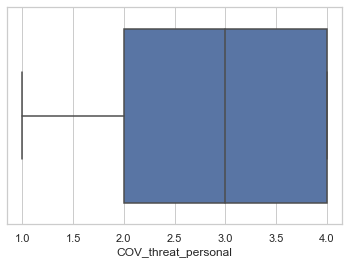

In [442]:
x = data['COV_threat_personal']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

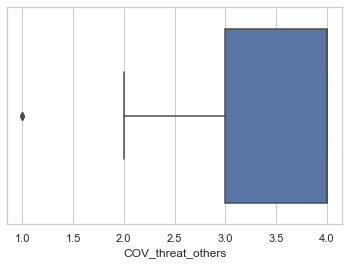

In [443]:
x = data['COV_threat_others']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

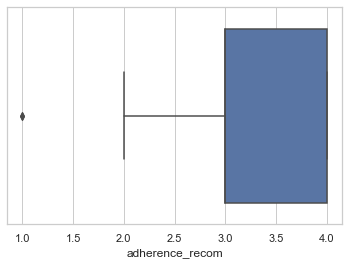

In [446]:
x = data['adherence_recom']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

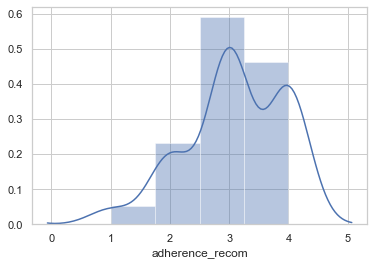

In [447]:
x = data['adherence_recom']

sns.set(style=None)

ax = sns.distplot(x, bins=4)
plt.show()

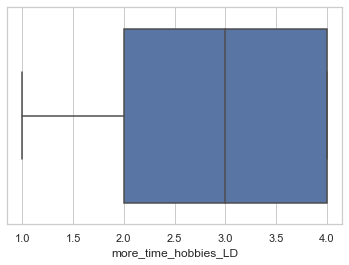

In [448]:
x = data['more_time_hobbies_LD']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

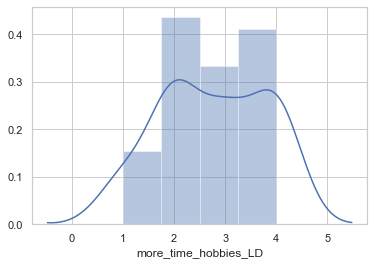

In [449]:
x = data['more_time_hobbies_LD']

sns.set(style=None)

ax = sns.distplot(x, bins=4)
plt.show()

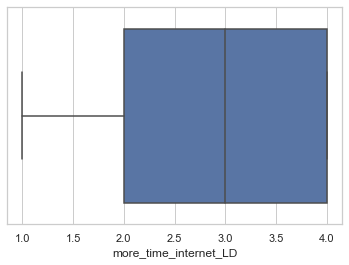

In [450]:
x = data['more_time_internet_LD']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

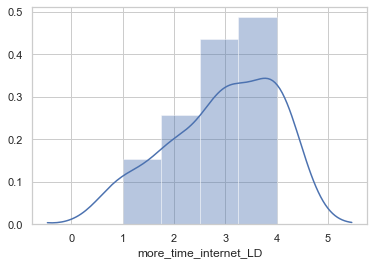

In [451]:
x = data['more_time_internet_LD']

sns.set(style=None)

ax = sns.distplot(x, bins=4)
plt.show()

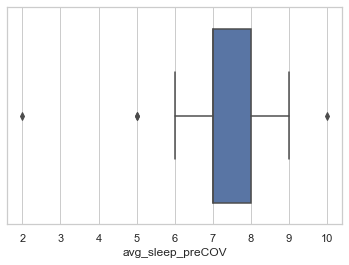

In [562]:
x = data['avg_sleep_preCOV']

sns.set(style="whitegrid")

ax = sns.boxplot(x)

plt.savefig('Figures/sleep_pre_COV_boxplot.jpg')
plt.show()

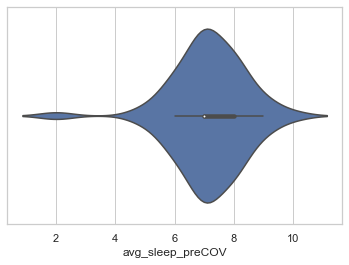

In [565]:
x = data['avg_sleep_preCOV']

sns.set(style="whitegrid")

ax = sns.violinplot(x)

plt.savefig('Figures/sleep_pre_COV_violin.jpg')
plt.show()

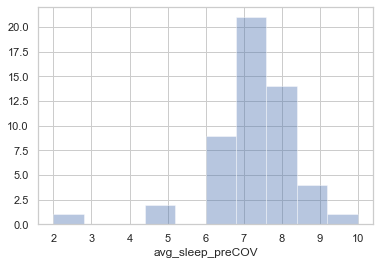

In [636]:
sns.set(style='whitegrid')

x = data['avg_sleep_preCOV']

ax = sns.distplot(x, bins=10, kde=False)

plt.savefig('Figures/sleep_pre_COV_hist.jpg')
plt.show()

In [637]:
data['avg_sleep_preCOV'].dtype

dtype('int64')

In [564]:
data['avg_sleep_preCOV'].value_counts()

7     21
8     14
6      9
9      4
5      2
10     1
2      1
Name: avg_sleep_preCOV, dtype: int64

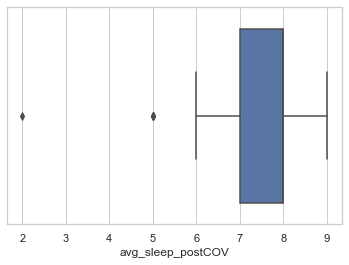

In [573]:
x = data['avg_sleep_postCOV']

sns.set(style="whitegrid")

ax = sns.boxplot(x)

plt.show()

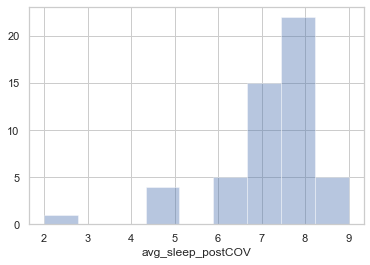

In [574]:
x = data['avg_sleep_postCOV']

sns.axes_style("white")

ax = sns.distplot(x, bins=9, kde=False)

plt.savefig('Figures/sleep_post_COV_hist.jpg')

plt.show()

In [570]:
data['avg_sleep_postCOV'].value_counts()

8    22
7    15
9     5
6     5
5     4
2     1
Name: avg_sleep_postCOV, dtype: int64

In [456]:
data['avg_cig_preCOV'].unique()

array([ 0,  2, 10,  4,  8, 13])

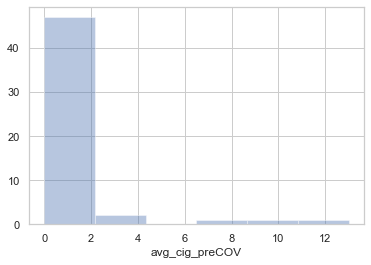

In [583]:
x = data['avg_cig_preCOV']

sns.set(style=None)

ax = sns.distplot(x, bins=6, kde=False)

plt.savefig('Figures/cig_pre_COV_hist.jpg')

plt.show()

In [582]:
data['avg_cig_postCOV'].value_counts()

0     46
8      2
17     1
10     1
4      1
3      1
Name: avg_cig_postCOV, dtype: int64

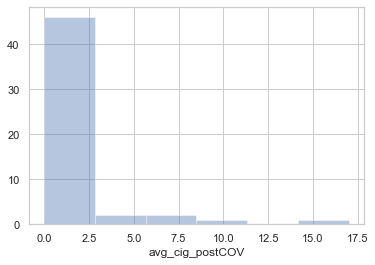

In [584]:
x = data['avg_cig_postCOV']

sns.set(style=None)

ax = sns.distplot(x, bins=6, kde=False)
plt.savefig('Figures/cig_post_COV_hist.jpg')
plt.show()

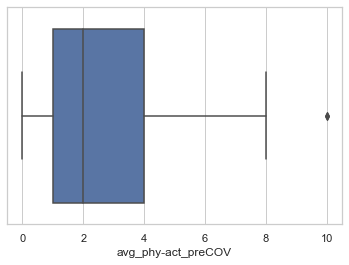

In [463]:
x = data['avg_phy-act_preCOV']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

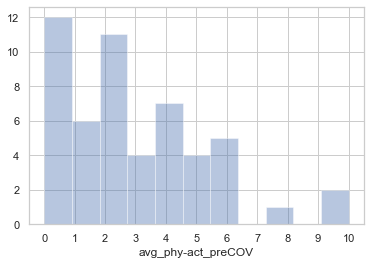

In [645]:
sns.set(style='whitegrid')

x = data['avg_phy-act_preCOV']

ax = sns.distplot(x, bins=11, kde=False)
plt.xticks(range(11))
plt.show()

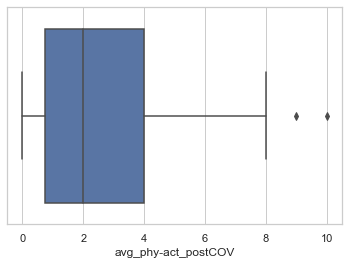

In [465]:
x = data['avg_phy-act_postCOV']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

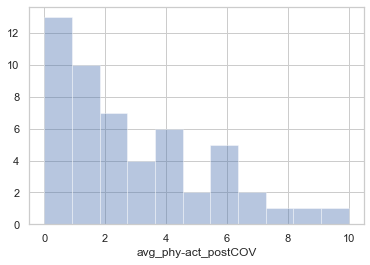

In [591]:
x = data['avg_phy-act_postCOV']

sns.set(style=None)

ax = sns.distplot(x, bins=11, kde=False)
plt.show()

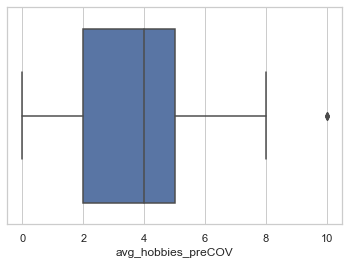

In [467]:
x = data['avg_hobbies_preCOV']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

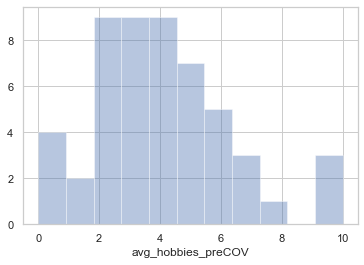

In [468]:
x = data['avg_hobbies_preCOV']

sns.set(style=None)

ax = sns.distplot(x, bins=11, kde=False)
plt.show()

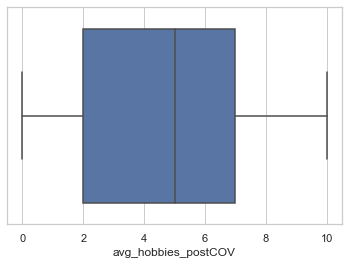

In [469]:
x = data['avg_hobbies_postCOV']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

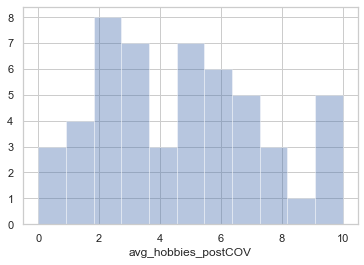

In [470]:
x = data['avg_hobbies_postCOV']

sns.set(style=None)

ax = sns.distplot(x, bins=11, kde=False)
plt.show()

In [471]:
data['avg_commute_preCOV'].unique()

array(['Between 30 and 60 minutes', 'Less than 30 minutes',
       'Between 90 and 120 minutes', 'Between 60 and 90 minutes',
       'More than 120 minutes'], dtype=object)

In [472]:
data['avg_commute_preCOV'].value_counts()

Between 30 and 60 minutes     23
Less than 30 minutes          15
Between 60 and 90 minutes     10
Between 90 and 120 minutes     2
More than 120 minutes          2
Name: avg_commute_preCOV, dtype: int64

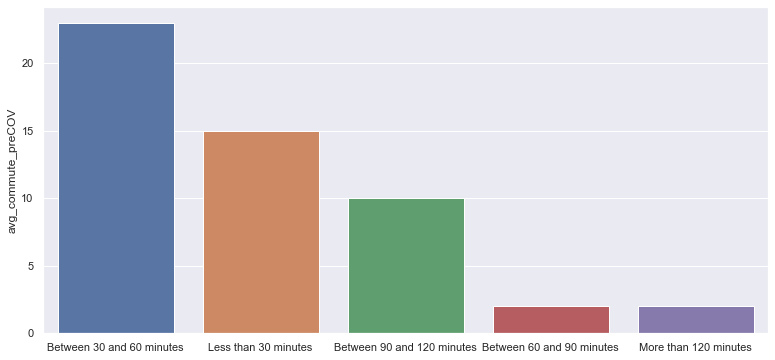

In [633]:
# categorical variable

x = data['avg_commute_preCOV'].unique()
y = data['avg_commute_preCOV'].value_counts()

sns.set(style=None)
plt.figure(figsize=(13, 6))

ax = sns.barplot(x,y)
plt.show()

In [627]:
data['avg_commute_preCOV'].value_counts()

Between 30 and 60 minutes     23
Less than 30 minutes          15
Between 60 and 90 minutes     10
Between 90 and 120 minutes     2
More than 120 minutes          2
Name: avg_commute_preCOV, dtype: int64

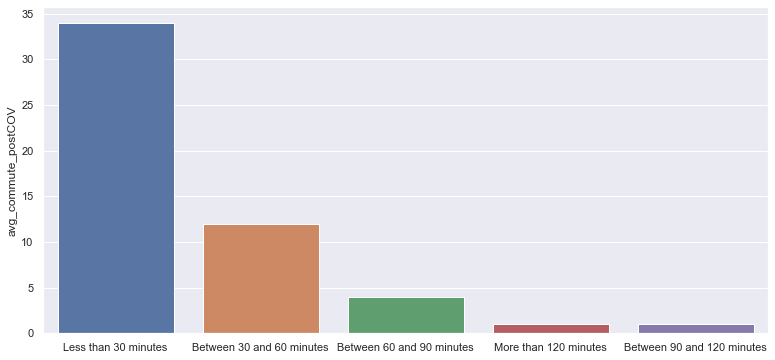

In [632]:
# categorical variable

labels = ['< 30min', '30-60min', '60-90min', '90-120min', '> 120min']

x = data['avg_commute_postCOV'].unique()
y = data['avg_commute_postCOV'].value_counts()

sns.set(style=None)
plt.figure(figsize=(13, 6))

ax = sns.barplot(x,y)
plt.show()

In [630]:
data['avg_commute_postCOV'].value_counts()

Less than 30 minutes          34
Between 30 and 60 minutes     12
Between 60 and 90 minutes      4
Between 90 and 120 minutes     1
More than 120 minutes          1
Name: avg_commute_postCOV, dtype: int64

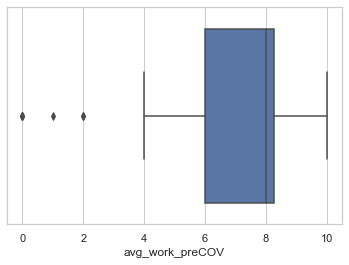

In [475]:
x = data['avg_work_preCOV']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

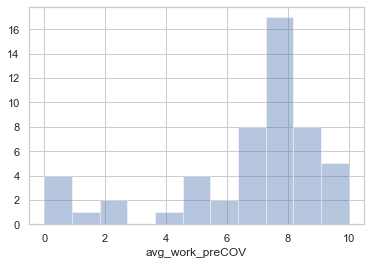

In [476]:
x = data['avg_work_preCOV']

sns.set(style=None)

ax = sns.distplot(x, bins=11, kde=False)
plt.show()

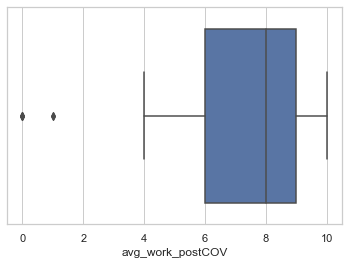

In [477]:
x = data['avg_work_postCOV']

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

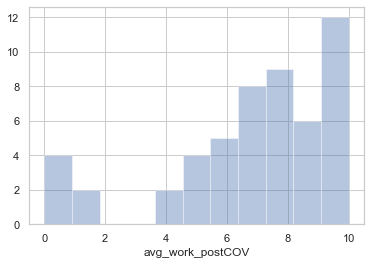

In [478]:
x = data['avg_work_postCOV']

sns.set(style=None)

ax = sns.distplot(x, bins=11, kde=False)
plt.show()

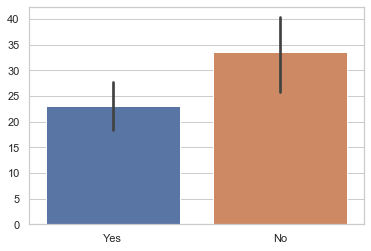

In [479]:
# categorical variable

x = data['work_remote_LD'].values
y = data['work_remote_LD'].index

sns.set(style=None)

ax = sns.barplot(x,y)
plt.show()

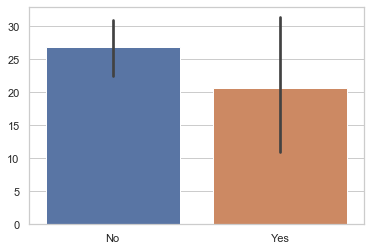

In [480]:
# categorical variable

x = data['work_reduced_LD'].values
y = data['work_reduced_LD'].index

sns.set(style=None)

ax = sns.barplot(x,y)
plt.show()

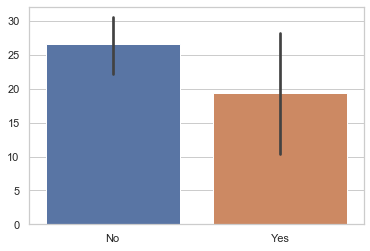

In [481]:
# categorical variable

x = data['loss_income'].values
y = data['loss_income'].index

sns.set(style=None)

ax = sns.barplot(x,y)
plt.show()

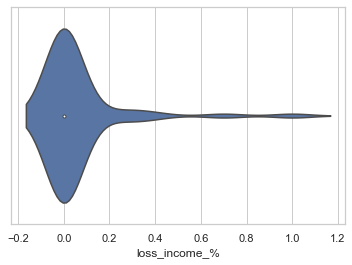

In [482]:
x = data['loss_income_%']

sns.set(style="whitegrid")

ax = sns.violinplot(x, palette="deep")
plt.show()

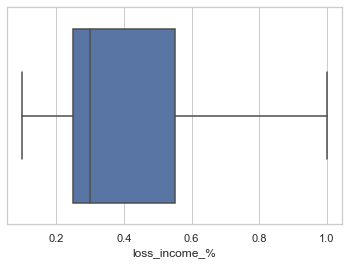

In [483]:
filter = data["loss_income_%"] != 0.

x = data['loss_income_%'].where(filter)

sns.set(style="whitegrid")

ax = sns.boxplot(x)
plt.show()

In [484]:
data['loss_income_%'].where(filter).count()

7

In [485]:
data['Gender'].value_counts()

Female    29
Male      23
Name: Gender, dtype: int64

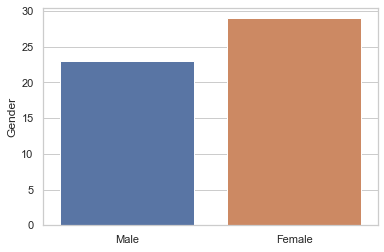

In [552]:

x = data['Gender'].unique()
y = data['Gender'].value_counts(ascending=True)

sns.set(style=None)

ax = sns.barplot(x,y)

#plt.figure(figsize=(15, 8))

plt.savefig('Figures/gender_barplot.jpg')

plt.show()

In [487]:
data['Gender'].value_counts()

Female    29
Male      23
Name: Gender, dtype: int64

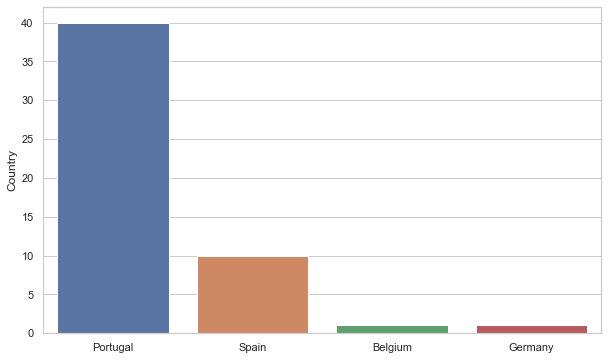

In [488]:

x = data['Country'].unique()
y = data['Country'].value_counts()

#sns.set(style=None)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x,y)

plt.savefig('Figures/country_barplot.jpg')

plt.show()

In [489]:
data['Country'].value_counts()

Portugal    40
Spain       10
Germany      1
Belgium      1
Name: Country, dtype: int64

In [490]:
data['Country'].value_counts()

Portugal    40
Spain       10
Germany      1
Belgium      1
Name: Country, dtype: int64

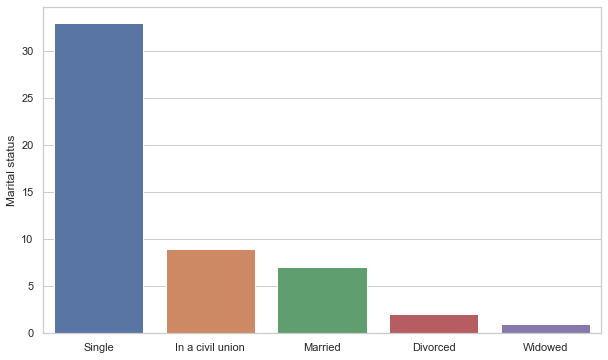

In [557]:
# also not counting the values

x = data['Marital status'].unique()
y = data['Marital status'].value_counts()

#sns.set(style=None)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x,y)

plt.savefig('Figures/marstatus_barplot.jpg')

plt.show()

In [492]:
data['Marital status'].value_counts()

Single              33
In a civil union     9
Married              7
Divorced             2
Widowed              1
Name: Marital status, dtype: int64

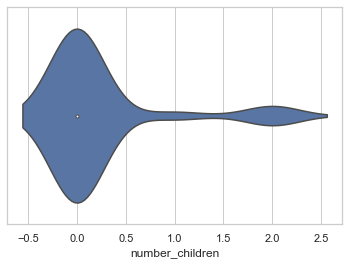

In [493]:
# make a violin plot

x = data['number_children']
ax = sns.violinplot(x)
plt.show()

In [494]:
data['number_children'].unique()

array([0, 1, 2])

In [495]:
data['number_children'].value_counts()

0    45
2     5
1     2
Name: number_children, dtype: int64

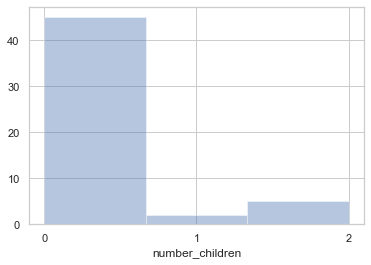

In [496]:
x = data['number_children']

sns.set(style=None)

#plt.figure(figsize=(10, 6))

ax = sns.distplot(x, bins=3, kde=False)
plt.xticks([0,1,2])
plt.show()

In [497]:
# only 7 people have children

data['number_children'][(data['number_children'] != 0)].count()

7

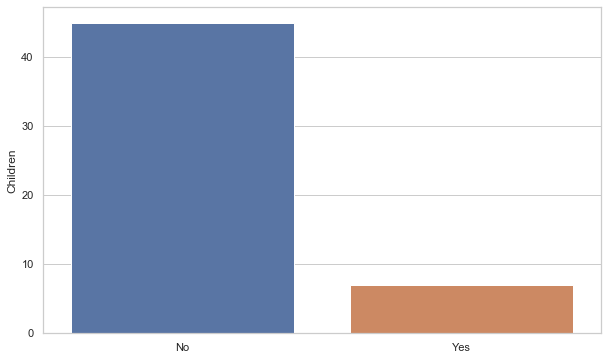

In [558]:
# also not counting the values

x = data['Children'].unique()
y = data['Children'].value_counts()

#sns.set(style=None)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x,y)

plt.savefig('Figures/children_barplot.jpg')

plt.show()

In [499]:
data['Children'][(data['Children'] == 'No')].count()

45

In [500]:
data['Children'][(data['Children'] == 'Yes')].count()

7

In [501]:
data['Profession'].unique()

array(['Grad Student', 'Art gallery assistant', 'Researcher',
       'Conservator- restorer', 'Investigadora', 'Admin Manager',
       'Museus worker gay', 'Civil Engineer ', 'Lead teacher',
       'Arquiteto Paisagista', 'Conservadora restauradora',
       'PhD student and singer', 'researcher', 'Engineer', 'Controller',
       'Student', 'Researcher ', 'Unemployed', 'Housekeeper', 'Student ',
       'project manager', 'Cultural Producer',
       'Student/ Computer Engineer / Consultant', 'Phd student',
       'Director', 'Architect', 'Consultant', 'PhD researcher', 'Teacher',
       'HR manager', 'Marketing', 'linguist', 'Estudante ',
       'Data Analyst', 'University professor ', 'civil engineer',
       'Função pública ', 'Retired', 0, 'Uni. Prof', 'Artist & Coach',
       'Medical doctor ', 'Teacher ', 'PhD Candidate', 'office worker'],
      dtype=object)

# Correlations

In [502]:
#the correlation is a number that goes from -1 to 1
# 1 - very strong positive correlation: if one variable increases, so does the other
# 0 - no correlation
# -1 - very strong negative correlation: if one variable increases, the other decreases

correlations = data.corr()
correlations

,COV_threat_personal,COV_threat_others,adherence_recom,more_time_hobbies_LD,more_time_TV_LD,more_time_internet_LD,avg_sleep_preCOV,avg_sleep_postCOV,avg_cig_preCOV,avg_cig_postCOV,avg_phy-act_preCOV,avg_phy-act_postCOV,avg_hobbies_preCOV,avg_hobbies_postCOV,avg_work_preCOV,avg_work_postCOV,loss_income_%,Age,number_children
COV_threat_personal,1.000000,0.704752,0.335623,-1.794333e-01,0.038513,0.165943,0.194097,0.037548,0.031748,0.061776,-0.122767,-0.041907,0.096313,-0.021372,-0.046547,0.037992,-0.128531,0.121753,3.492505e-02
COV_threat_others,0.704752,1.000000,0.323766,-1.074204e-01,0.076018,0.155031,0.146246,0.199344,0.010565,0.047975,-0.234703,-0.068264,-0.014570,0.037405,-0.074985,-0.068698,-0.042659,-0.089757,-2.016913e-01
adherence_recom,0.335623,0.323766,1.000000,2.843913e-01,0.245977,0.287766,0.082309,0.327396,-0.036569,-0.036819,-0.280561,-0.058771,-0.106271,-0.076102,0.049826,0.218682,-0.193910,-0.028660,-2.000334e-01
more_time_hobbies_LD,-0.179433,-0.107420,0.284391,1.000000e+00,0.347067,0.304956,0.179121,0.423565,0.031593,0.039893,0.011227,0.174167,0.083962,0.365162,0.073183,0.048336,0.015660,0.227864,-1.726604e-18
more_time_TV_LD,0.038513,0.076018,0.245977,3.470671e-01,1.000000,0.479201,0.135748,0.279877,-0.094252,-0.165283,-0.296331,-0.235633,-0.125129,0.093380,-0.028236,0.017483,-0.136680,0.345856,3.423940e-02
more_time_internet_LD,0.165943,0.155031,0.287766,3.049555e-01,0.479201,1.000000,0.190734,0.147029,0.047730,0.079765,-0.223309,-0.165651,0.062572,0.251941,-0.127170,-0.091762,-0.013366,0.051944,-1.351508e-01
avg_sleep_preCOV,0.194097,0.146246,0.082309,1.791212e-01,0.135748,0.190734,1.000000,0.585932,0.033384,0.041585,0.045055,0.341439,-0.005538,0.158624,-0.104804,-0.199247,-0.094428,0.072801,1.117459e-01
avg_sleep_postCOV,0.037548,0.199344,0.327396,4.235652e-01,0.279877,0.147029,0.585932,1.000000,-0.023982,-0.007165,-0.073591,0.143653,-0.185496,0.067518,0.040368,-0.131083,-0.042341,0.081694,6.880586e-02
avg_cig_preCOV,0.031748,0.010565,-0.036569,3.159334e-02,-0.094252,0.047730,0.033384,-0.023982,1.000000,0.955343,0.038534,-0.121025,0.058634,-0.102023,-0.059581,0.029812,-0.098671,0.102445,8.125930e-02
avg_cig_postCOV,0.061776,0.047975,-0.036819,3.989279e-02,-0.165283,0.079765,0.041585,-0.007165,0.955343,1.000000,0.070656,-0.117461,0.133880,-0.064446,-0.106327,-0.040558,-0.099346,0.065239,4.577798e-02


In [503]:
# I have to change some things: number of children turn into categorical
# turn city of residence into country of residence (bigger groups per value)
# does not show correlation with categorical variables

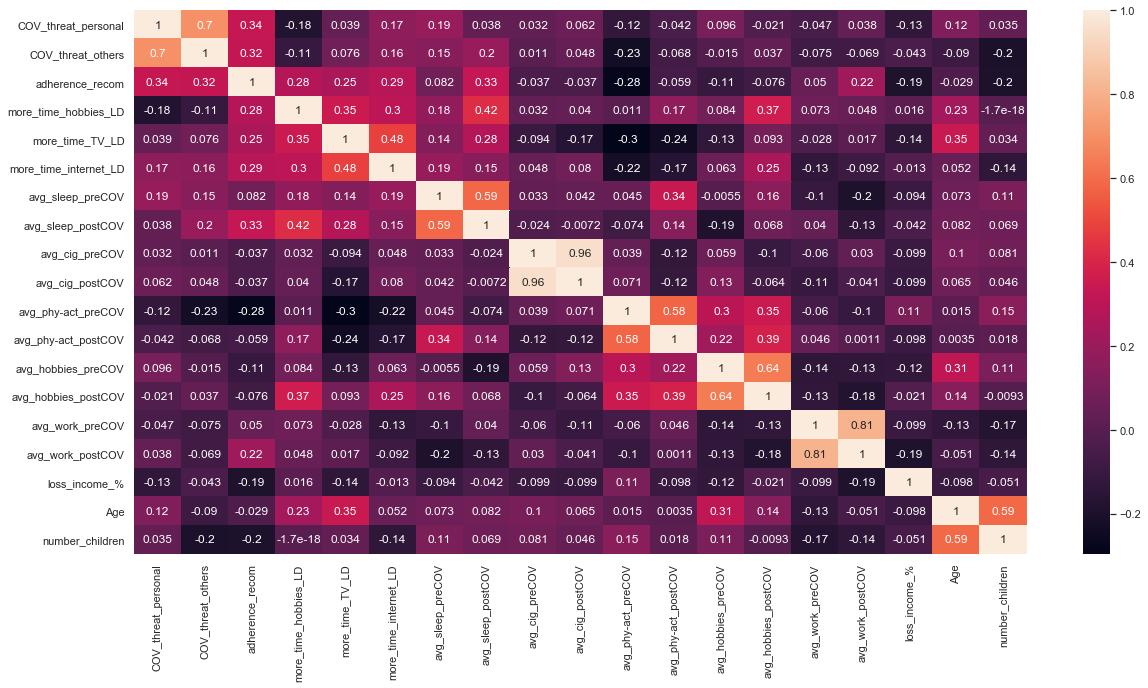

In [504]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, xticklabels = data.corr().columns,yticklabels = data.corr().columns)
plt.show()

In [ ]:
data2 = data.pivot_table(index = ['Category'])

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, xticklabels = data.corr().columns,yticklabels = data.corr().columns)
plt.show()

# Dataframes for dependent t tests

## Hours of sleep per night pre and post Covid-19

In [505]:
# create dictionary with data from dataframe data
hours_sleep = { 'respondent_id' : data['respondent_id'],
               'A' : data['avg_sleep_preCOV'],
               'D' : data['avg_sleep_postCOV']}

# turn dictionary into dataframe
hours_sleep = pd.DataFrame(hours_sleep)

# create new columns Delta and assign D-A value
hours_sleep['Delta'] = hours_sleep['D'] - hours_sleep['A']

hours_sleep.head()

,respondent_id,A,D,Delta
0,1,7,8,1
1,2,8,6,-2
2,3,7,8,1
3,4,8,8,0
4,5,8,8,0


In [506]:
hours_sleep.mean()

respondent_id    2.374169e+92
A                7.134615e+00
D                7.269231e+00
Delta            1.346154e-01
dtype: float64

In [507]:
hours_sleep.std()

A        1.25290
D        1.28514
Delta    1.15519
dtype: float64

In [508]:
hours_sleep['A'].value_counts()

7     21
8     14
6      9
9      4
5      2
10     1
2      1
Name: A, dtype: int64

In [509]:
hours_sleep['D'].value_counts()

8    22
7    15
9     5
6     5
5     4
2     1
Name: D, dtype: int64

## Number of cigaretters per day pre and post Covid-19

In [510]:
# create dictionary with data from dataframe data
n_cig = { 'respondent_id' : data['respondent_id'],
               'A' : data['avg_cig_preCOV'],
               'D' : data['avg_cig_postCOV']}

# turn dictionary into dataframe
n_cig = pd.DataFrame(n_cig)

# create new columns Delta and assign D-A value
n_cig['Delta'] = n_cig['D'] - n_cig['A']

n_cig.head()

,respondent_id,A,D,Delta
0,1,0,0,0
1,2,0,0,0
2,3,0,0,0
3,4,0,0,0
4,5,0,0,0


In [511]:
n_cig.mean()

respondent_id    2.374169e+92
A                7.884615e-01
D                9.615385e-01
Delta            1.730769e-01
dtype: float64

In [512]:
n_cig.std()

A        2.569325
D        3.112036
Delta    1.004327
dtype: float64

In [513]:
n_cig['A'].value_counts()

0     46
4      2
13     1
10     1
8      1
2      1
Name: A, dtype: int64

In [514]:
# most people remain the same, as they are not smokers; those who are seem to be smoking more

n_cig['D'].value_counts()

0     46
8      2
17     1
10     1
4      1
3      1
Name: D, dtype: int64

## Hours of physical activity per week pre and post Covid-19

In [515]:
# create dictionary with data from dataframe data
hours_physact = { 'respondent_id' : data['respondent_id'],
               'A' : data['avg_phy-act_preCOV'],
               'D' : data['avg_phy-act_postCOV']}

# turn dictionary into dataframe
hours_physact = pd.DataFrame(hours_physact)

# create new columns Delta and assign D-A value
hours_physact['Delta'] = hours_physact['D'] - hours_physact['A']

hours_physact.head()

,respondent_id,A,D,Delta
0,1,0,0,0
1,2,2,0,-2
2,3,0,0,0
3,4,2,4,2
4,5,2,0,-2


In [516]:
hours_physact.mean()

respondent_id    2.374169e+92
A                2.807692e+00
D                2.711538e+00
Delta           -9.615385e-02
dtype: float64

In [517]:
hours_physact.std()

A        2.551727
D        2.659327
Delta    2.394926
dtype: float64

In [518]:
hours_physact['A'].value_counts()

0     12
2     11
4      7
1      6
6      5
5      4
3      4
10     2
8      1
Name: A, dtype: int64

In [519]:
# more people give lower values

hours_physact['D'].value_counts()

0     13
1     10
2      7
4      6
6      5
3      4
7      2
5      2
10     1
9      1
8      1
Name: D, dtype: int64

## Hours dedicated to hobbies per week pre and post Covid-19 

In [520]:
# create dictionary with data from dataframe data
hours_hobbies = { 'respondent_id' : data['respondent_id'],
               'A' : data['avg_hobbies_preCOV'],
               'D' : data['avg_hobbies_postCOV']}

# turn dictionary into dataframe
hours_hobbies = pd.DataFrame(hours_hobbies)

# create new columns Delta and assign D-A value
hours_hobbies['Delta'] = hours_hobbies['D'] - hours_hobbies['A']

hours_hobbies.head()

,respondent_id,A,D,Delta
0,1,6,6,0
1,2,6,5,-1
2,3,1,7,6
3,4,4,4,0
4,5,2,2,0


In [521]:
hours_hobbies.mean()

respondent_id    2.374169e+92
A                3.980769e+00
D                4.653846e+00
Delta            6.730769e-01
dtype: float64

In [522]:
hours_hobbies.std()

A        2.445407
D        2.902903
Delta    2.298517
dtype: float64

In [523]:
hours_hobbies['A'].value_counts()

4     9
3     9
2     9
5     7
6     5
0     4
10    3
7     3
1     2
8     1
Name: A, dtype: int64

In [524]:
hours_hobbies['D'].value_counts()

2     8
5     7
3     7
6     6
10    5
7     5
1     4
8     3
4     3
0     3
9     1
Name: D, dtype: int64

## Minutes of commute per week pre and post Covid-19 

In [525]:
# This is a categorical value

In [526]:
data['avg_commute_preCOV'].value_counts()

Between 30 and 60 minutes     23
Less than 30 minutes          15
Between 60 and 90 minutes     10
Between 90 and 120 minutes     2
More than 120 minutes          2
Name: avg_commute_preCOV, dtype: int64

In [527]:
data['avg_commute_postCOV'].value_counts()

Less than 30 minutes          34
Between 30 and 60 minutes     12
Between 60 and 90 minutes      4
Between 90 and 120 minutes     1
More than 120 minutes          1
Name: avg_commute_postCOV, dtype: int64

## Hours of work per day pre and post Covid-19 

In [528]:
# create dictionary with data from dataframe data
hours_work = { 'respondent_id' : data['respondent_id'],
               'A' : data['avg_work_preCOV'],
               'D' : data['avg_work_postCOV']}

# turn dictionary into dataframe
hours_work = pd.DataFrame(hours_work)

# create new columns Delta and assign D-A value
hours_work['Delta'] = hours_work['D'] - hours_work['A']

hours_work.head()

,respondent_id,A,D,Delta
0,1,8,10,2
1,2,8,8,0
2,3,7,7,0
3,4,8,8,0
4,5,8,7,-1


In [529]:
hours_work.mean()

respondent_id    2.374169e+92
A                6.826923e+00
D                6.961538e+00
Delta            1.346154e-01
dtype: float64

In [530]:
hours_work.std()

A        2.805605
D        2.963580
Delta    1.782583
dtype: float64

In [531]:
hours_work['A'].value_counts()

8     17
9      8
7      8
10     5
5      4
0      4
6      2
2      2
4      1
1      1
Name: A, dtype: int64

In [532]:
# more people reporting 10 hours of work per day
# scale really should be higher

hours_work['D'].value_counts()

10    12
8      9
7      8
9      6
6      5
5      4
0      4
4      2
1      2
Name: D, dtype: int64

# Dependent t tests

## hours of sleep pre and post Covid-19

In [533]:
hours_sleep

from scipy.stats import t

# Null hypothesis: no change in mean hours of sleep
# Alternative hypothesis: change in mean hours of sleep

sample_mean = np.mean(hours_sleep['Delta'])

sample_std = np.std(hours_sleep['Delta'])

# loc = 0 because we always assume null hypothesis
# difference between confidence interval and hypothesis testing
t_dist = t(df = len(hours_sleep['Delta']) - 1, loc = 0, scale = sample_std/np.sqrt(len(hours_sleep['Delta'])) )

# t_dist = t(df = len(trucks) - 1, loc = sample_mean, scale = sample_std/np.sqrt(len(trucks)))


In [534]:
t_dist.interval(0.95)

(-0.3184996368586612, 0.3184996368586612)

In [535]:
hours_sleep.head()

,respondent_id,A,D,Delta
0,1,7,8,1
1,2,8,6,-2
2,3,7,8,1
3,4,8,8,0
4,5,8,8,0


In [536]:
# Null hypothesis cannot be rejected
# No difference in mean hours of sleep per night

sample_mean

0.1346153846153846

In [537]:
# p_value = 2*(1-t_dist.cdf(sample_mean))

## Number of cigaretters per day

In [579]:
n_cig

from scipy.stats import t

# Null hypothesis: no change in mean hours of sleep
# Alternative hypothesis: change in mean hours of sleep

delta = n_cig['Delta']

sample_mean = np.mean(n_cig['Delta'])

sample_std = np.std(n_cig['Delta'])

# loc = 0 because we always assume null hypothesis
# difference between confidence interval and hypothesis testing
t_dist = t(df = len(delta) - 1, loc = 0, scale = sample_std/np.sqrt(len(delta)) )

print(sample_mean)
t_dist.interval(0.95)

0.17307692307692307


(-0.2769048441768778, 0.2769048441768778)

In [581]:
data['avg_cig_postCOV'].value_counts()

0     46
8      2
17     1
10     1
4      1
3      1
Name: avg_cig_postCOV, dtype: int64

## Hours of physical activity per week

In [585]:
hours_physact

from scipy.stats import t

# Null hypothesis: no change in mean hours of sleep
# Alternative hypothesis: change in mean hours of sleep

delta = hours_physact['Delta']

sample_mean = np.mean(hours_physact['Delta'])

sample_std = np.std(hours_physact['Delta'])

# loc = 0 because we always assume null hypothesis
# difference between confidence interval and hypothesis testing
t_dist = t(df = len(delta) - 1, loc = 0, scale = sample_std/np.sqrt(len(delta)) )

print(sample_mean)
t_dist.interval(0.95)

-0.09615384615384616


(-0.6603094965907057, 0.6603094965907057)

## Hours dedicated to hobbies per week

In [586]:
hours_hobbies

from scipy.stats import t

# Null hypothesis: no change in mean hours of sleep
# Alternative hypothesis: change in mean hours of sleep

delta = hours_hobbies['Delta']

sample_mean = np.mean(hours_hobbies['Delta'])

sample_std = np.std(hours_hobbies['Delta'])

# loc = 0 because we always assume null hypothesis
# difference between confidence interval and hypothesis testing
t_dist = t(df = len(delta) - 1, loc = 0, scale = sample_std/np.sqrt(len(delta)) )

print(sample_mean)
t_dist.interval(0.95)

0.6730769230769231


(-0.6337284826248419, 0.6337284826248419)

## Hours of work per day

In [587]:
hours_work

from scipy.stats import t

# Null hypothesis: no change in mean hours of sleep
# Alternative hypothesis: change in mean hours of sleep

delta = hours_work['Delta']

sample_mean = np.mean(hours_work['Delta'])

sample_std = np.std(hours_work['Delta'])

# loc = 0 because we always assume null hypothesis
# difference between confidence interval and hypothesis testing
t_dist = t(df = len(delta) - 1, loc = 0, scale = sample_std/np.sqrt(len(delta)) )

print(sample_mean)
t_dist.interval(0.95)

0.1346153846153846


(-0.4914792163674422, 0.4914792163674422)

## Hours of work per day by transition to remote (yes/no)

## Minutes of commute: categorical variable

In [538]:
data.columns

Index(['respondent_id', 'COV_threat_personal', 'COV_threat_others',
       'adherence_recom', 'more_time_hobbies_LD', 'more_time_TV_LD',
       'more_time_internet_LD', 'avg_sleep_preCOV', 'avg_sleep_postCOV',
       'avg_cig_preCOV', 'avg_cig_postCOV', 'avg_phy-act_preCOV',
       'avg_phy-act_postCOV', 'avg_hobbies_preCOV', 'avg_hobbies_postCOV',
       'avg_commute_preCOV', 'avg_commute_postCOV', 'avg_work_preCOV',
       'avg_work_postCOV', 'work_remote_LD', 'work_reduced_LD', 'loss_income',
       'loss_income_%', 'Gender', 'Age', 'Country', 'Marital status',
       'number_children', 'Profession', 'comments', 'Children'],
      dtype='object')

In [539]:
data['avg_commute_preCOV'].unique()

array(['Between 30 and 60 minutes', 'Less than 30 minutes',
       'Between 90 and 120 minutes', 'Between 60 and 90 minutes',
       'More than 120 minutes'], dtype=object)

In [540]:
data1 = pd.DataFrame(data['avg_commute_preCOV'])
data2 = pd.DataFrame(data['avg_commute_postCOV'])

data1.columns = ['Variable']
data2.columns = ['Variable']

data1['type'] = 'pre'
data2['type'] = 'post'


In [541]:
data2

,Variable,type
0,Less than 30 minutes,post
1,Between 30 and 60 minutes,post
2,Between 30 and 60 minutes,post
3,Between 30 and 60 minutes,post
4,Between 60 and 90 minutes,post
5,Between 30 and 60 minutes,post
6,Less than 30 minutes,post
7,Less than 30 minutes,post
8,Less than 30 minutes,post
9,More than 120 minutes,post


In [542]:
categorical_test = pd.concat([data1,data2], axis = 0)
categorical_test['dummy'] = "random"


In [543]:
contingency = categorical_test.pivot_table(index = ['Variable'], columns = ['type'], values = ['dummy'], aggfunc=['count'])


In [544]:

# returns an array of results
# - the value of chi-squared observed
# p-value for this chi-squared
# degrees of freedom of test
# expected quantities sold, assuming independence

# in this example we would accept H0 at significance level of 0.1%
# p value of about 0.15%
# reject at signficance level of 1%

from scipy.stats import chi2_contingency

chi2_contingency(contingency)

(14.062585034013605,
 0.007097965814544832,
 4,
 array([[17.5, 17.5],
        [ 7. ,  7. ],
        [ 1.5,  1.5],
        [24.5, 24.5],
        [ 1.5,  1.5]]))

In [592]:
data.columns

Index(['respondent_id', 'COV_threat_personal', 'COV_threat_others',
       'adherence_recom', 'more_time_hobbies_LD', 'more_time_TV_LD',
       'more_time_internet_LD', 'avg_sleep_preCOV', 'avg_sleep_postCOV',
       'avg_cig_preCOV', 'avg_cig_postCOV', 'avg_phy-act_preCOV',
       'avg_phy-act_postCOV', 'avg_hobbies_preCOV', 'avg_hobbies_postCOV',
       'avg_commute_preCOV', 'avg_commute_postCOV', 'avg_work_preCOV',
       'avg_work_postCOV', 'work_remote_LD', 'work_reduced_LD', 'loss_income',
       'loss_income_%', 'Gender', 'Age', 'Country', 'Marital status',
       'number_children', 'Profession', 'comments', 'Children'],
      dtype='object')

# Linear and multilinear regressions

In [622]:
# multilinear regression
# 'COV_threat_personal', 'COV_threat_others' predict 'adherence_recom', see R-squared
# However, 'COV_threat_personal', 'COV_threat_others' are strongly correlated between themselves

import statsmodels.api as sm 

X = data[['COV_threat_personal', 'COV_threat_others']]
y = data['adherence_recom']

# fitting the model to take our X variables and calculate y
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        adherence_recom   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              278.6
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    7.75e-28
Time:                        17:43:01   Log-Likelihood:                         -69.372
No. Observations:                  52   AIC:                                      142.7
Df Residuals:                      50   BIC:                                      146.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
COV_threat_personal     0.2284      0.187      1.219      0.229      -0.148       0.605
COV_threat_others       0.6858      0.160      4.281      0.000       0.364       1.008
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                1.034
Skew:                           0.289   Prob(JB):                        0.596
Kurtosis:                       2.621   Cond. No.                         8.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [646]:
data.columns

Index(['respondent_id', 'COV_threat_personal', 'COV_threat_others',
       'adherence_recom', 'more_time_hobbies_LD', 'more_time_TV_LD',
       'more_time_internet_LD', 'avg_sleep_preCOV', 'avg_sleep_postCOV',
       'avg_cig_preCOV', 'avg_cig_postCOV', 'avg_phy-act_preCOV',
       'avg_phy-act_postCOV', 'avg_hobbies_preCOV', 'avg_hobbies_postCOV',
       'avg_commute_preCOV', 'avg_commute_postCOV', 'avg_work_preCOV',
       'avg_work_postCOV', 'work_remote_LD', 'work_reduced_LD', 'loss_income',
       'loss_income_%', 'Gender', 'Age', 'Country', 'Marital status',
       'number_children', 'Profession', 'comments', 'Children'],
      dtype='object')

In [647]:
# multilinear regression
# Categorical variables

import statsmodels.api as sm 

X = data[['Gender', 'Age', 'Country', 'Children']]
y = data['adherence_recom']

# fitting the model to take our X variables and calculate y
model = sm.OLS(y,X).fit()

model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [623]:
# linear regression

import statsmodels.api as sm 

x = data['COV_threat_personal']
y = data['COV_threat_others']

# fitting the model to take our X variables and calculate y
model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      COV_threat_others   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              897.7
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    4.83e-34
Time:                        17:43:19   Log-Likelihood:                         -62.884
No. Observations:                  52   AIC:                                      127.8
Df Residuals:                      51   BIC:                                      129.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
COV_threat_personal     1.1376      0.038     29.961      0.000       1.061       1.214
==============================================================================
Omnibus:                       13.621   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.458
Skew:                           1.167   Prob(JB):                     0.000725
Kurtosis:                       4.107   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [624]:

import statsmodels.api as sm 

x = data['COV_threat_personal']
y = data['adherence_recom']

# fitting the model to take our X variables and calculate y
model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        adherence_recom   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              402.3
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    7.51e-26
Time:                        17:43:44   Log-Likelihood:                         -77.491
No. Observations:                  52   AIC:                                      157.0
Df Residuals:                      51   BIC:                                      158.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
COV_threat_personal     1.0086      0.050     20.058      0.000       0.908       1.110
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.597
Skew:                           0.065   Prob(JB):                        0.742
Kurtosis:                       2.491   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [625]:
import statsmodels.api as sm 

x = data['COV_threat_others']
y = data['adherence_recom']

# fitting the model to take our X variables and calculate y
model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        adherence_recom   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              550.6
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    5.44e-29
Time:                        17:44:01   Log-Likelihood:                         -70.134
No. Observations:                  52   AIC:                                      142.3
Df Residuals:                      51   BIC:                                      144.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
COV_threat_others     0.8758      0.037     23.464      0.000       0.801       0.951
==============================================================================
Omnibus:                        1.319   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.341
Skew:                           0.325   Prob(JB):                        0.512
Kurtosis:                       2.556   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""